## 1. How many players are listed in the dataset?

In [2]:
import pandas as pd

# path file CSV
players_data = "/Users/rithikagurram/Documents/OPT Work/week2/Player_Stats.csv"

# Load the dataset
df = pd.read_csv(players_data)

# Filter out rows where PLAYER is missing or blank
players = df['PLAYER'].notna() & (df['PLAYER'].astype(str).str.strip() != "")

# Count only those rows
num_valid_players = players.sum()

print("Number of actual players in the dataset:", num_valid_players)




Number of actual players in the dataset: 32


## 2. What is the average number of goals (g) scored per player?


In [3]:
valid_players = df.loc[players].copy()  

# convert the 'G' column to numeric and fill any missing values with 0
valid_players.loc['G'] = pd.to_numeric(valid_players['G'],errors='coerce').fillna(0)

#calculate and print the average goals per player
average_goals = valid_players['G'].mean()
print(f"Average goals for player: {average_goals:.2f}")


Average goals for player: 7.31


## 3.Which player scored the highest number of goals (g)?

In [21]:
top_scorer = valid_players.loc[valid_players['G'].idxmax()]
print(f"Top scorer: {top_scorer['PLAYER']} with {int(top_scorer['G'])} goals")

Top scorer: Muchnick, Emma with 34 goals


# 4. Who had the most assists this season?

In [5]:
top_assister = valid_players.loc[valid_players['A'].idxmax()]
print(f"Top assister: {top_assister['PLAYER']} with {int(top_assister['A'])} assists")

Top assister: Ward, Emma with 46 assists


## 5. Which player had the highest goals per game ratio

In [10]:
 #Split "GP-GS" into two columns safely
parts = valid_players['GP-GS'].str.split('-', expand=True)
valid_players['GP'] = pd.to_numeric(parts[0], errors='coerce').fillna(0)

#convert goals to numeric
valid_players['G'] = pd.to_numeric(valid_players['G'],errors='coerce').fillna(0)

#calculate goals per game ratio,avoiding division by zero
valid_players['GPG'] = valid_players['G']/valid_players['GP'].replace({0:1})

#Identify and print the players with the highest GPG
top = valid_players.loc[valid_players['GPG'].idxmax()]
print(f"Top goals-per-game: {top['PLAYER']} with {top['GPG']:.2f} goals per game")

Top goals-per-game: Adamson, Olivia with 3.33 goals per game


# 6. Who had the highest shooting accuracy and shot-on-goal percentage?

In [13]:
# Convert 'SH%' and 'SOG%' to numeric
valid_players['SH%'] = pd.to_numeric(valid_players['SH%'], errors='coerce')
valid_players['SOG%'] = pd.to_numeric(valid_players['SOG%'], errors='coerce')

# Identify top shooting accuracy and top shot-on-goal percentage
top_shooter = valid_players.loc[valid_players['SH%'].idxmax(), ['PLAYER', 'SH%']]
top_sog = valid_players.loc[valid_players['SOG%'].idxmax(), ['PLAYER', 'SOG%']]

print(f"Highest SH%: {top_shooter['PLAYER']} with {top_shooter['SH%']}")
print(f"Highest SOG%: {top_sog['PLAYER']} with {top_sog['SOG%']}")

Highest SH%: Rich, Mackenzie with 1.0
Highest SOG%: Peters, Bri with 1.0


# 7. How many players caused more than 5 turnovers ?first give your answer

In [14]:
#convert 'CT to numeric
valid_players['CT'] = pd.to_numeric(valid_players['CT'],errors='coerce').fillna(0)

#count players with more than 5 caused turnovers
num_caused = (valid_players['CT']>5).sum()
print(f"Number of players with CT > 5: {num_caused}")

Number of players with CT > 5: 10


## 8. Which player had the most combined offensive contribution ?

In [15]:
# Convert 'G' and 'A' to numeric
valid_players['G'] = pd.to_numeric(valid_players['G'], errors='coerce').fillna(0)
valid_players['A'] = pd.to_numeric(valid_players['A'], errors='coerce').fillna(0)

# Compute combined offensive contribution
valid_players['Combined'] = valid_players['G'] + valid_players['A']

# Identify and print the top contributor
top = valid_players.loc[valid_players['Combined'].idxmax(), ['PLAYER', 'Combined']]
print(f"Top contributor: {top['PLAYER']} with {int(top['Combined'])} total goals + assists")



Top contributor: Ward, Emma with 76 total goals + assists


# 9. Who had the highest impact on defense ?

In [16]:
 #Convert defensive stats to numeric
valid_players['GB'] = pd.to_numeric(valid_players['GB'], errors='coerce').fillna(0)
valid_players['CT'] = pd.to_numeric(valid_players['CT'], errors='coerce').fillna(0)
valid_players['DC'] = pd.to_numeric(valid_players['DC'], errors='coerce').fillna(0)

# Compute defense impact score and identify top contributor
valid_players['Defense_Impact'] = valid_players['GB'] + valid_players['CT'] + valid_players['DC']
top_defender = valid_players.loc[valid_players['Defense_Impact'].idxmax(), ['PLAYER', 'Defense_Impact']]

print(f"Top defensive impact: {top_defender['PLAYER']} with a score of {int(top_defender['Defense_Impact'])}")

Top defensive impact: Rode, Meghan with a score of 76


# 10. What is the correlation between shots taken and goals scored?

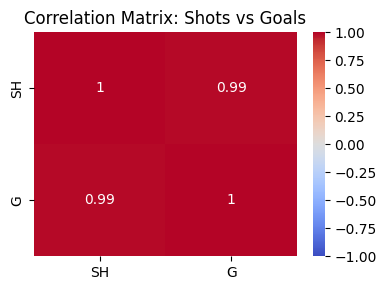

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'SH' (Shots) and 'G' (Goals) to numeric
valid_players['SH'] = pd.to_numeric(valid_players['SH'], errors='coerce').fillna(0)
valid_players['G'] = pd.to_numeric(valid_players['G'], errors='coerce').fillna(0)

# Compute correlation matrix for SH and G
corr_matrix = valid_players[['SH', 'G']].corr()

# Plot heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix: Shots vs Goals")
plt.tight_layout()
plt.show()

# 11. Who was the most improved player?

In [22]:
# Split 'GP-GS' into 'GP' and 'GS'
valid_players[['GP', 'GS']] = valid_players['GP-GS'].str.split('-', expand=True)

# Convert to numeric
valid_players['GP'] = pd.to_numeric(valid_players['GP'], errors='coerce').fillna(0)
valid_players['G'] = pd.to_numeric(valid_players['G'], errors='coerce').fillna(0)
valid_players['A'] = pd.to_numeric(valid_players['A'], errors='coerce').fillna(0)
valid_players['SH%'] = pd.to_numeric(valid_players['SH%'], errors='coerce') / 100  # convert % to fraction

# Compute metrics
valid_players['goals_per_game'] = valid_players['G'] / valid_players['GP']
valid_players['assists_per_game'] = valid_players['A'] / valid_players['GP']

# Define improvement score: sum of normalized metrics
valid_players['improvement_score'] = valid_players['goals_per_game'] + valid_players['assists_per_game'] + valid_players['SH%']

# Identify most improved player
most_improved = valid_players.loc[valid_players['improvement_score'].idxmax(), 
                         ['PLAYER', 'GP', 'goals_per_game', 'assists_per_game', 'SH%', 'improvement_score']]

print("Most Improved Player based on defined criteria:")
print(most_improved)



Most Improved Player based on defined criteria:
PLAYER               Adamson, Olivia
GP                               3.0
goals_per_game              3.333333
assists_per_game                 2.0
SH%                         0.000056
improvement_score           5.333389
Name: 1, dtype: object
